In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress

In [2]:
# File to Load (Remember to Change These)
file2="statewide_cases.csv"

# Read Purchasing File and store into Pandas data frame

df= pd.read_csv(file2)

In [3]:
df

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date
0,Santa Clara,151,6,151,6,3/18/2020
1,Santa Clara,183,8,32,2,3/19/2020
2,Santa Clara,246,8,63,0,3/20/2020
3,Santa Clara,269,10,23,2,3/21/2020
4,Santa Clara,284,13,15,3,3/22/2020
...,...,...,...,...,...,...
41168,Yolo,12670,181,31,0,2/21/2021
41169,Yolo,12689,181,19,0,2/22/2021
41170,Yolo,12729,185,40,4,2/23/2021
41171,Yolo,12760,185,31,0,2/24/2021


In [5]:
df.nunique()

county                   63
totalcountconfirmed    9581
totalcountdeaths       1583
newcountconfirmed      1493
newcountdeaths          150
date                    345
dtype: int64

In [30]:
county_df=df.dropna(how="any")
county_df.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date
0,Santa Clara,151,6,151,6,3/18/2020
1,Santa Clara,183,8,32,2,3/19/2020
2,Santa Clara,246,8,63,0,3/20/2020
3,Santa Clara,269,10,23,2,3/21/2020
4,Santa Clara,284,13,15,3,3/22/2020


In [31]:
county_df.nunique()

county                   61
totalcountconfirmed    9581
totalcountdeaths       1583
newcountconfirmed      1493
newcountdeaths          150
date                    345
dtype: int64

In [35]:
county_df["county"].value_counts()

Ventura           688
Santa Clara       688
Merced            688
Tulare            688
Orange            688
                 ... 
Lake              684
Alpine            664
Modoc             656
Out Of Country    636
county              1
Name: county, Length: 61, dtype: int64

In [52]:
County_List=county_df.loc[county_df["date"]=="2/24/2021"]
County_List["county"].value_counts()

Del Norte          2
Mendocino          2
San Diego          2
Mono               2
Siskiyou           2
Solano             2
San Joaquin        2
Yuba               2
Santa Clara        2
Inyo               2
Colusa             2
Lake               2
Sutter             2
San Bernardino     2
Los Angeles        2
Lassen             2
Amador             2
Shasta             2
El Dorado          2
Out Of Country     2
San Mateo          2
Glenn              2
Fresno             2
Marin              2
Alameda            2
Sacramento         2
Imperial           2
Santa Cruz         2
Yolo               2
Trinity            2
Alpine             2
Calaveras          2
Mariposa           2
Tuolumne           2
Sierra             2
Tehama             2
Madera             2
Modoc              2
Merced             2
Stanislaus         2
Napa               2
Sonoma             2
Santa Barbara      2
San Luis Obispo    2
Humboldt           2
San Francisco      2
Tulare             2
Plumas       

In [54]:
Clean_county=County_List.drop_duplicates(subset=["county"])
Clean_county["county"].value_counts()

Del Norte          1
Mendocino          1
San Diego          1
Mono               1
Siskiyou           1
Solano             1
San Joaquin        1
Yuba               1
Santa Clara        1
Inyo               1
Colusa             1
Lake               1
Sutter             1
San Bernardino     1
Los Angeles        1
Lassen             1
Amador             1
Shasta             1
El Dorado          1
Out Of Country     1
San Mateo          1
Glenn              1
Fresno             1
Marin              1
Alameda            1
Sacramento         1
Imperial           1
Santa Cruz         1
Yolo               1
Trinity            1
Alpine             1
Calaveras          1
Mariposa           1
Tuolumne           1
Sierra             1
Tehama             1
Madera             1
Modoc              1
Merced             1
Stanislaus         1
Napa               1
Sonoma             1
Santa Barbara      1
San Luis Obispo    1
Humboldt           1
San Francisco      1
Tulare             1
Plumas       

In [62]:
Counties_df=Clean_county.loc[(Clean_county["county"]!="Out Of Country")]
Counties_df["county"].value_counts()

Del Norte          1
Lassen             1
San Diego          1
Mono               1
Siskiyou           1
Solano             1
San Joaquin        1
Yuba               1
Santa Clara        1
Inyo               1
Colusa             1
Lake               1
Sutter             1
Los Angeles        1
Amador             1
Alpine             1
Shasta             1
El Dorado          1
San Bernardino     1
San Mateo          1
Glenn              1
Fresno             1
Marin              1
Alameda            1
Sacramento         1
Imperial           1
Santa Cruz         1
Yolo               1
Trinity            1
Calaveras          1
Mendocino          1
Mariposa           1
Tuolumne           1
Sierra             1
Tehama             1
Madera             1
Modoc              1
Merced             1
Stanislaus         1
Napa               1
Sonoma             1
Santa Barbara      1
San Luis Obispo    1
Humboldt           1
San Francisco      1
Tulare             1
Plumas             1
Orange       

In [63]:
Total_Cases=Counties_df.sort_values("totalcountconfirmed",ascending=False )
Total_Cases["county"].array

<PandasArray>
[      'Del Norte',          'Fresno',      'Sacramento',            'Kern',
       'El Dorado',            'Napa',          'Sutter',         'Alameda',
         'Ventura',          'Alpine',     'San Joaquin',          'Plumas',
    'Contra Costa',      'San Benito',            'Yuba',          'Lassen',
      'Stanislaus',          'Sierra',          'Tulare',          'Tehama',
        'Monterey',          'Nevada',        'Tuolumne',       'San Mateo',
      'Unassigned',        'Mariposa',       'Mendocino',          'Amador',
   'San Francisco',           'Modoc',   'Santa Barbara',            'Lake',
        'Humboldt',          'Solano',         'Trinity',          'Merced',
  'San Bernardino',          'Sonoma',       'Riverside',        'Imperial',
       'San Diego',          'Orange',           'Glenn',           'Kings',
          'Placer', 'San Luis Obispo',       'Calaveras',          'Colusa',
          'Madera',      'Santa Cruz',        'Siskiyou',     

In [64]:
Total_Cases["totalcountconfirmed"].array

<PandasArray>
[    '960',   '94794',   '92742',   '91525',    '8993',    '8976',    '8778',
   '80070',   '77238',      '77',   '65274',     '626',   '61776',    '5743',
    '5425',    '5095',   '49851',      '47',   '46976',    '4566',   '41495',
    '3927',    '3887',   '38763',      '38',     '374',    '3540',    '3444',
   '34061',     '329',   '31563',    '3134',    '3123',   '29577',     '294',
   '28295',  '280583',   '27954',  '278293',   '26843',  '258460',  '244743',
    '2210',   '21871',   '19648',   '19309',    '1864',    '1863',   '15390',
   '14458',    '1385',   '13044',   '12760',    '1253',    '1189', '1150322',
  '109671',   '10922',   '10915']
Length: 59, dtype: object

In [65]:
Total_Cases["totalcountdeaths"].array

<PandasArray>
[    '5',  '1412',  '1456',   '786',    '98',    '68',    '96',  '1218',
   '820',     '0',  '1061',     '6',   '655',    '59',    '36',    '19',
   '941',     '0',   '739',    '52',   '323',    '74',    '59',   '502',
     '0',     '7',    '43',    '40',   '394',     '4',   '398',    '40',
    '33',   '164',     '5',   '394',  '2673',   '295',  '3707',   '586',
  '3230',  '3848',    '23',   '218',   '231',   '221',    '47',    '13',
   '209',   '181',    '14',   '197',   '185',    '36',     '4', '20987',
  '1747',   '172',   '160']
Length: 59, dtype: object

In [67]:
county=['Del Norte',          'Fresno',      'Sacramento',            'Kern',
       'El Dorado',            'Napa',          'Sutter',         'Alameda',
         'Ventura',          'Alpine',     'San Joaquin',          'Plumas',
    'Contra Costa',      'San Benito',            'Yuba',          'Lassen',
      'Stanislaus',          'Sierra',          'Tulare',          'Tehama',
        'Monterey',          'Nevada',        'Tuolumne',       'San Mateo',
      'Unassigned',        'Mariposa',       'Mendocino',          'Amador',
   'San Francisco',           'Modoc',   'Santa Barbara',            'Lake',
        'Humboldt',          'Solano',         'Trinity',          'Merced',
  'San Bernardino',          'Sonoma',       'Riverside',        'Imperial',
       'San Diego',          'Orange',           'Glenn',           'Kings',
          'Placer', 'San Luis Obispo',       'Calaveras',          'Colusa',
          'Madera',      'Santa Cruz',        'Siskiyou',           'Marin',
            'Yolo',            'Inyo',            'Mono',     'Los Angeles',
     'Santa Clara',          'Shasta',           'Butte']

Cases=[    '960',   '94794',   '92742',   '91525',    '8993',    '8976',    '8778',
   '80070',   '77238',      '77',   '65274',     '626',   '61776',    '5743',
    '5425',    '5095',   '49851',      '47',   '46976',    '4566',   '41495',
    '3927',    '3887',   '38763',      '38',     '374',    '3540',    '3444',
   '34061',     '329',   '31563',    '3134',    '3123',   '29577',     '294',
   '28295',  '280583',   '27954',  '278293',   '26843',  '258460',  '244743',
    '2210',   '21871',   '19648',   '19309',    '1864',    '1863',   '15390',
   '14458',    '1385',   '13044',   '12760',    '1253',    '1189', '1150322',
  '109671',   '10922',   '10915']

Deaths=[    '5',  '1412',  '1456',   '786',    '98',    '68',    '96',  '1218',
   '820',     '0',  '1061',     '6',   '655',    '59',    '36',    '19',
   '941',     '0',   '739',    '52',   '323',    '74',    '59',   '502',
     '0',     '7',    '43',    '40',   '394',     '4',   '398',    '40',
    '33',   '164',     '5',   '394',  '2673',   '295',  '3707',   '586',
  '3230',  '3848',    '23',   '218',   '231',   '221',    '47',    '13',
   '209',   '181',    '14',   '197',   '185',    '36',     '4', '20987',
  '1747',   '172',   '160']

Final_df=pd.DataFrame({"County":county,
                       "Cases":Cases,
                       "Deaths":Deaths})

Final_df.head()


,County,Cases,Deaths
0,Del Norte,960,5
1,Fresno,94794,1412
2,Sacramento,92742,1456
3,Kern,91525,786
4,El Dorado,8993,98


In [82]:
Cases_df=Final_df.groupby(["County"]).sum()
Cases_df.head()

,Cases,Deaths
County,,
Alameda,80070,1218
Alpine,77,0
Amador,3444,40
Butte,10915,160
Calaveras,1864,47


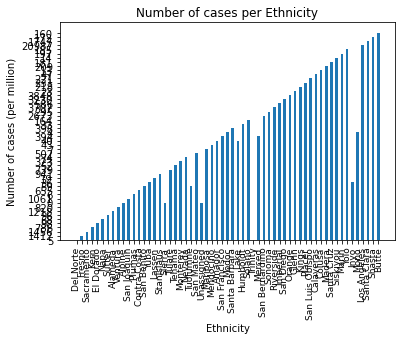

In [96]:
Counties = Final_df["County"]
Cases_load = Final_df["Deaths"]
plt.title("Number of cases per Ethnicity")
plt.ylabel("Number of cases (per million)")
plt.xlabel("Ethnicity")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(Counties, Cases_load, width)
plt.tick_params(axis="x", which="major", labelsize=9)

plt.show()

Text(0.5, 1.0, 'Percentage of Cases for Genders impacted by COVID in California')

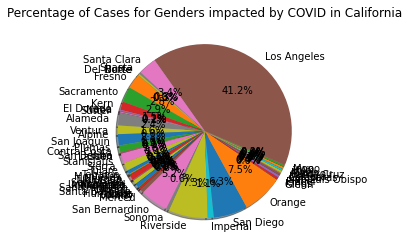

In [87]:
#Pie chart of the percentage(%) of genders impacted in California 
sizes=Final_df["Deaths"]

labels=Final_df["County"].unique()

explode= (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of deaths per county impacted by COVID in California")

Text(0.5, 1.0, 'Percentage of Cases for Genders impacted by COVID in California')

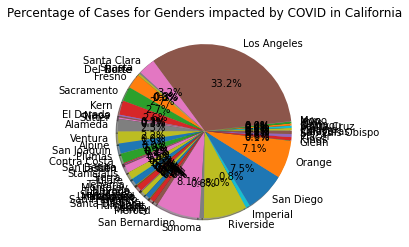

In [88]:
#Pie chart of the percentage(%) of genders impacted in California 
size=Final_df["Cases"]

label=Final_df["County"].unique()

explode= (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

plt.pie(size, labels=label,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Cases per county impacted by COVID in California")